### Problem 1.
#### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
#### Task:
##### 1. fitting it to the periodic function
##### 2. plot the fit
#### Data
##### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
##### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize

Text(0, 0.5, 'Temperature (Max. & Min.)')

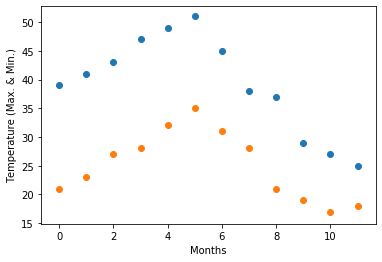

In [2]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.scatter(months, max_temp)
plt.scatter(months, min_temp)
plt.xlabel('Months')
plt.ylabel('Temperature (Max. & Min.)')

In [3]:
# An equation that can be used to model these data is of the form: y = A cos(B(x - C)) + D,
# where A,B,C,D, are constants, y is the temperature in °C and x is the month (1–12).
# Replace January to December with 1 to 12.
# A = amplitude = (ymax - ymin)/2
# B = 2π/12
# C = units translated to the right
# D = ymin + amplitude = units translated up

def yearly_temps_periodic_func(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [4]:
# Fitting to the given periodic function.
# optimize.curve_fit : Use non-linear least squares to fit a function, f, to data.
# The last parameter passed to 'optimize.curve_fit' is array-like, and holds random value for 'avg', 'ampl', 'time_offset'
# respectively, which in turn will be optimized to give 'max_res'.
# max_res : Optimal values for the parameters so that the sum of the squared residuals of "f(xdata, *max_res) - ydata" 
# is minimized
# max_cov :  The estimated covariance of popt.

max_res, max_cov = optimize.curve_fit(yearly_temps_periodic_func, months, max_temp, [20, 10, 0])
# max_res, max_cov

In [5]:
min_res, min_cov = optimize.curve_fit(yearly_temps_periodic_func, months, min_temp, [-40, 20, 0])
# min_res, min_cov

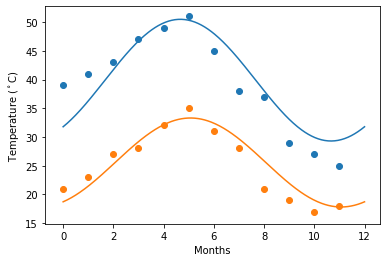

In [6]:
# Plotting the graph
days = np.linspace(0, 12, num=365)

plt.clf()

plt.scatter(months, max_temp)
plt.plot(days, yearly_temps_periodic_func(days, *max_res))

plt.scatter(months, min_temp)
plt.plot(days, yearly_temps_periodic_func(days, *min_res))

plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Problem 2.
#### This assignment is for visualization using matplotlib:
#### data to use:
#### url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#### titanic = pd.read_csv(url)
#### Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [7]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
pd.Categorical(titanic["sex"])

[female, male, female, male, female, ..., female, male, male, male, NaN]
Length: 1310
Categories (2, object): [female, male]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000168067B5808>],
      dtype=object)

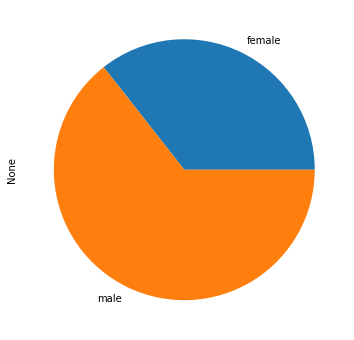

In [9]:
plt.figure(num=1, figsize=(6,6))
sex_series = titanic.groupby(by=["sex"]).size()
sex_series.plot(kind='pie', subplots=True)

In [10]:
def cat(s):
    if(s == 'male'):
        return 0
    elif(s == 'female'):
        return 1

In [11]:
titanic["sex_cat"] = titanic["sex"].apply(cat)

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
 14  sex_cat    1309 non-null   float64
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


In [13]:
titanic_new = titanic[titanic["age"].notnull() & titanic["fare"] > 0][['age', 'fare', 'sex_cat']]
titanic_new.shape

(1037, 3)

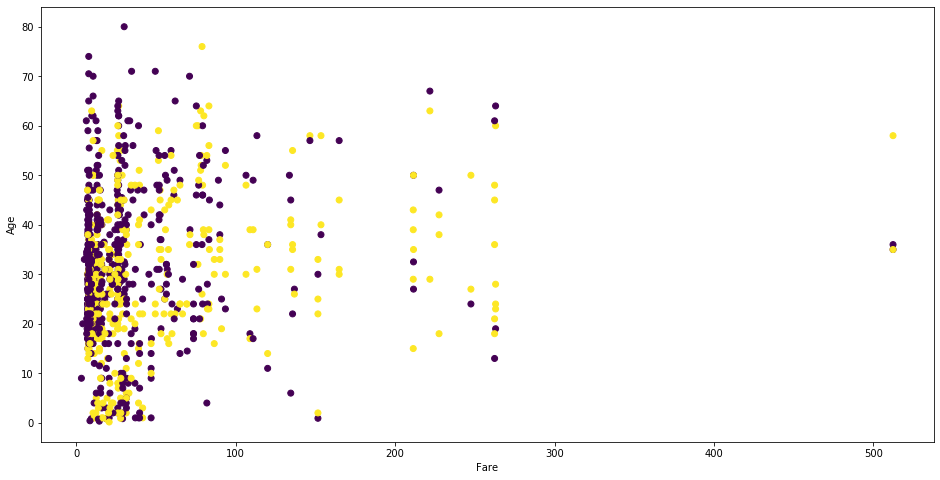

In [14]:
plt.figure(num=1, figsize=(16,8))
plt.scatter(x=titanic_new["fare"], y=titanic_new["age"], c=titanic_new["sex_cat"], color=None)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

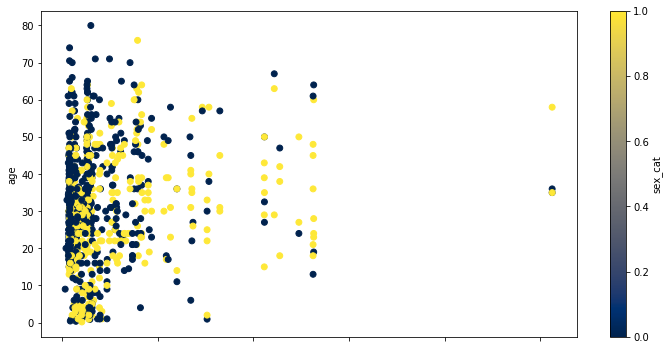

In [15]:
#                        OR
# colormap = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

titanic_new.plot.scatter(x="fare", y="age", c="sex_cat",  figsize=(12,6), s=35, colormap="cividis")